In [51]:
# !pip install obspy
# !pip install segyio
import segypy

In [2]:
# from obspy.io.segy.segy import _read_segy
folder=r"..\d11_data\\"
folder=r"C:\D11_seismic2move\\"
# stream = _read_segy(folder+'cropped_4_spect_decomp.sgy', headonly=True)
import segyio

In [52]:
path=folder+'cropped_4_spect_decomp.sgy'
path=folder+'NEC-OSN-97_2_North_crop.sgy'
path=folder+'NEC-OSN-97_2_NORTH_PetrelExport.sgy'
path=folder+'NEC-OSN-97_2_North.sgy'
# Set verbose level
segypy.verbose=1

#%% Read only SegyHeader and SegyTraceHeader
SH = segypy.getSegyHeader(path)
# with segyio.open(path, endian = 'msb') as f:
#     print(f.ilines)
# f = segyio.open(path)
# x = segyio.tools.collect(f.trace[:])
# x = x.reshape((len(f.ilines), len(f.xlines), len(f.samples)))
# np.all(x == segyio.tools.cube(f))
# # with segyio.open(path, "r") as f:
# #     x = segyio.tools.collect(f.traces[:])
# #     print(f.ilines)
# # dir(f)
# x.shape,len(f.ilines), len(f.xlines)
# ,f.samples

# dir(f.header)
fs=1e3/(f.samples[1]-f.samples[0])
# fs

# print(segyio.tools.wrap(f.text[0]))
len(f.samples)
# ,x[52460]
# x.shape

SegyPY0.57:  getSegyHeader : succesfully read C:\D11_seismic2move\\NEC-OSN-97_2_North.sgy


4000

In [53]:
SH

{'filename': 'C:\\D11_seismic2move\\\\NEC-OSN-97_2_North.sgy',
 'Job': 2,
 'Line': 0,
 'Reel': 2,
 'DataTracePerEnsemble': 0,
 'AuxiliaryTracePerEnsemble': 0,
 'dt': 2000,
 'dtOrig': 0,
 'ns': 4000,
 'nsOrig': 0,
 'DataSampleFormat': 1,
 'EnsembleFold': 0,
 'TraceSorting': 0,
 'VerticalSumCode': 0,
 'SweepFrequencyEnd': 0,
 'SweepLength': 0,
 'SweepType': 0,
 'SweepChannel': 0,
 'SweepTaperlengthStart': 0,
 'SweepTaperLengthEnd': 0,
 'TaperType': 0,
 'CorrelatedDataTraces': 0,
 'BinaryGain': 0,
 'AmplitudeRecoveryMethod': 0,
 'MeasurementSystem': 1,
 'ImpulseSignalPolarity': 0,
 'VibratoryPolarityCode': 0,
 'Unassigned1': 0,
 'SegyFormatRevisionNumber': 0,
 'FixedLengthTraceFlag': 1,
 'NumberOfExtTextualHeaders': 0,
 'Unassigned2': 0,
 'ntraces': 1333466.0,
 'time': array([0.000e+00, 2.000e-03, 4.000e-03, ..., 7.994e+00, 7.996e+00,
        7.998e+00])}

In [54]:
STH = segypy.getAllSegyTraceHeaders(SH)

In [47]:
# f.text[0]
# f.depth_slice[199]
# plt.figure(figsize=(16,16))
# plt.imshow(f.depth_slice[199], cmap=plt.cm.BuPu_r)
f.samples
dt=f.samples[1]-f.samples[0]
dt,dt*len(f.samples)

(2.0, 8000.0)

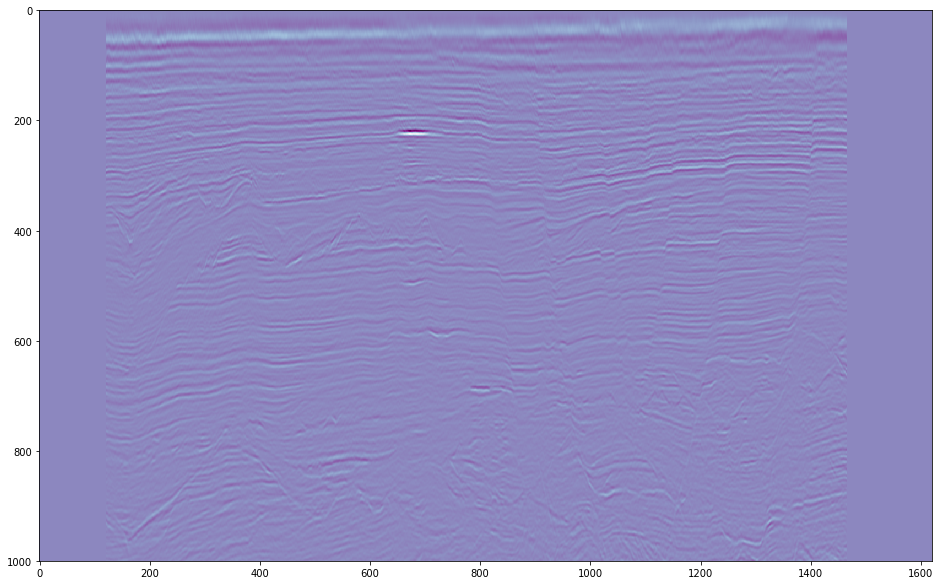

In [44]:
# f.text[0]
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(f.iline[1101][:,:1000].T, cmap=plt.cm.BuPu_r)

In [11]:
print(len(f.header),len(f.ilines),len(f.xlines))
# for line in f.ilines[:20]:
#     print(line)
fxy=[(fh[segyio.TraceField.SourceX],fh[segyio.TraceField.SourceY]) for fh in f.header]

2013282 1242 1621


KeyboardInterrupt: 

In [36]:
import numpy as np
fileds = 13, 73, 77, 189, 193
keys=[key for key in f.header[0][fileds]]
fnav=np.zeros((len(f.header),len(fileds)))

In [44]:
fnav.shape


(2013282, 5)

In [45]:
# segyio.TraceField.TraceNumber,segyio.TraceField.SourceX,segyio.TraceField.SourceY,segyio.TraceField.INLINE_3D,segyio.TraceField.CROSSLINE_3D

for i,fh in enumerate(f.header):
    if i%100000==0:
        print(i,end=', ')
    fnav[i]=[fh[key] for key in keys]


.....................

In [46]:
sourceX = f.attributes(segyio.TraceField.SourceX)[:]


KeyboardInterrupt: 

In [ ]:
plt.plot(sourceX)

In [32]:
dir(f)

keys
# dir(segyio.TraceField)

[TraceNumber, SourceX, SourceY, INLINE_3D, CROSSLINE_3D]

In [4]:
# dir(f),f.iline(1852)
print(f.header[10][segyio.TraceField.SourceX],f.header[10][segyio.TraceField.SourceY])
# f.header[10]

59010410 227002507


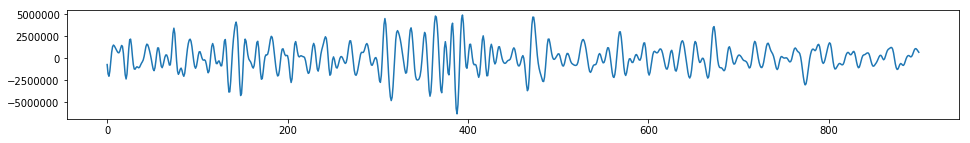

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
signal = x[0]

plt.figure(figsize=(16,2))
plt.plot(signal.data)
plt.show()

In [85]:
# data = np.stack(t.data for t in stream.traces[0:100])
# data.shape
from scipy.signal import cwt
from bruges.filters import ricker as ricker_

FS = fs

def ricky(length, width):
    return ricker_(0.256, 1/FS, width)

In [86]:
# f.xlines
# spec_data=np.zeros((*x.shape,len(widths)))
# spec_data.shape
# coeffs

In [87]:
# vm = np.percentile(data, 99)
# print("The 99th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data.max()))
mi, ma = 2, 128
widths =np.arange(mi, ma+1)
widths=[5,10,12,20,35,50,70]
spec_data=np.zeros((*x.shape,len(widths)))
for i,signal in enumerate(x):
    if i%1000==1:
        print('.',end='')
    coeffs = cwt(signal, ricky, widths=widths)
    spec_data[i,:,:]=coeffs.T
(len(f.samples)-1)*0.002,coeffs.shape
# spec_data[i,:,:]

.........................................

(1.8, (7, 901))

In [70]:
spec_data.shape

(52461, 41, 7)

In [88]:
dstpath=folder+'cropped_4_spect_decomp_f{}.sgy'
dstpath=folder+'NEC-OSN-97_2_North_crop_f{}.sgy'
spec = segyio.tools.metadata(f)
# spec.samples = spec.samples[:len(spec.samples) - 50]
for i,fq in enumerate(widths):
    print(fq)
    with segyio.create(dstpath.format(fq), spec) as dst:
        dst.text[0] = f.text[0]
        dst.bin = f.bin
        dst.header = f.header
        dst.trace = spec_data[:,:,i]

5
10
12
20
35
50
70


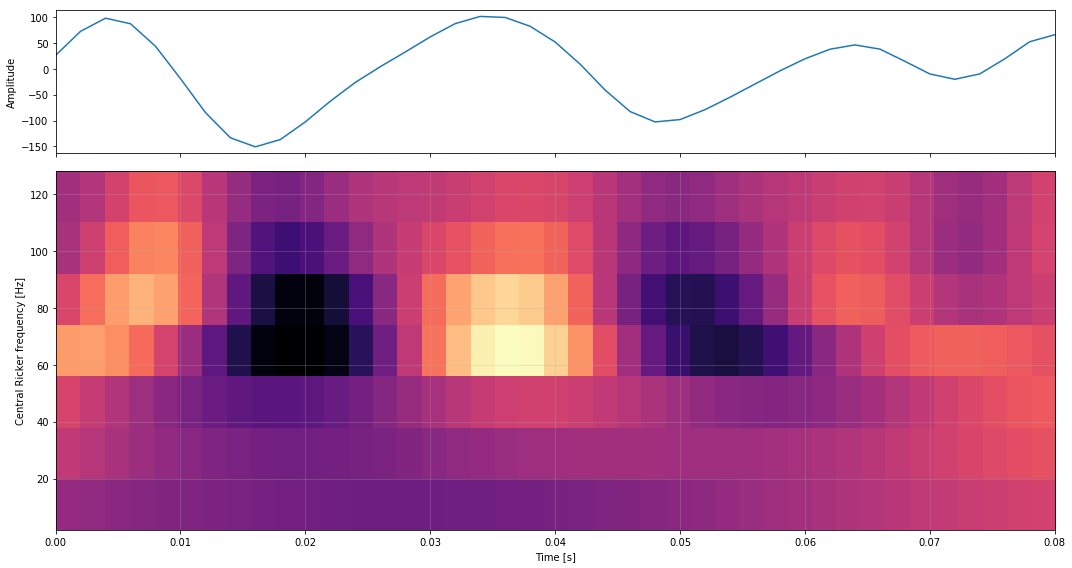

In [54]:
# plt.imshow(mdata.T, cmap="Greys", vmin=-vm, vmax=vm, aspect='auto')
mx = np.percentile(coeffs, 99.8)
fig, axs = plt.subplots(figsize=(15, 8), nrows=2, gridspec_kw={'height_ratios':[2, 5]})

axs[0].plot(f.samples,signal/1e4)
axs[0].set_xlim(f.samples[0],f.samples[-1])
axs[0].set_ylabel('Amplitude')
axs[0].set_xticklabels([])
axs[1].imshow(coeffs, cmap='magma', aspect='auto', extent=[0, (len(f.samples)-1)/fs, mi, ma], vmin=-mx, vmax=mx, origin='lower')
axs[1].set_ylabel('Central Ricker frequency [Hz]')
axs[1].set_xlabel('Time [s]')
axs[1].grid(alpha=0.33)

plt.tight_layout()

freq  0 0.0
freq  1 0.0
freq  2 24.390243902439025
freq  3 24.390243902439025
freq  4 36.58536585365854
freq  5 36.58536585365854
freq  6 36.58536585365854


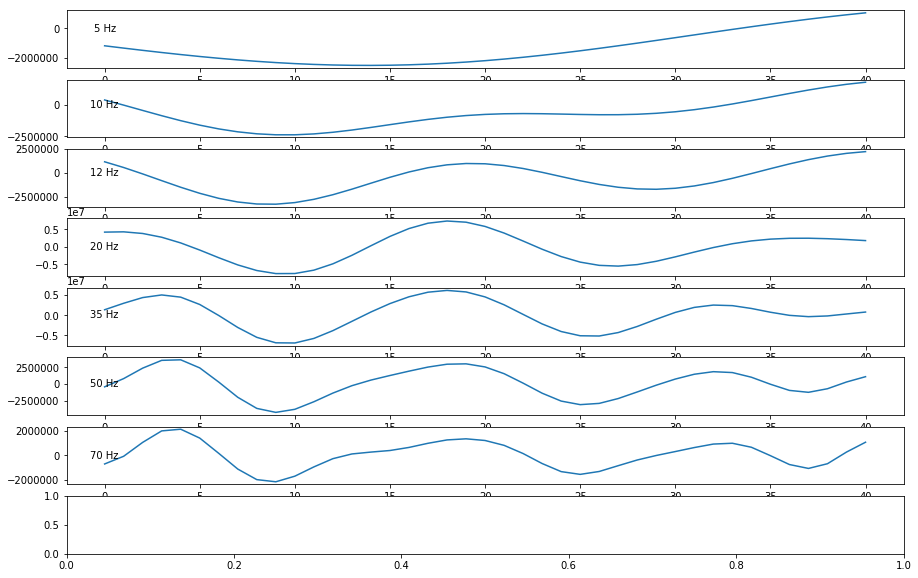

In [55]:
# plt.figure(figsize=(18,6))
# plt.imshow(mdata.T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto')
# plt.colorbar()
# plt.show()
fig, axs = plt.subplots(figsize=(15, 10), nrows=8)
freqs=[3,7,12,20,35,50,70]
for ax, r in zip(axs, range(len(coeffs))):
    ax.plot(coeffs[r])
    print('freq ',r,end=' ')
    fr,sig=ampspec(coeffs[r],1000*dt,smooth=False)
    print(fr[np.argmax(sig)])
    ax.text(0, 1.5e4, f"{widths[r]} Hz", va='center', ha='center')

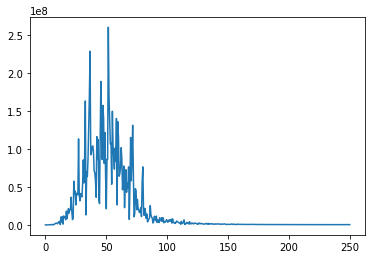

In [26]:
fr[np.argmax(sig)]
plt.plot(fr,sig)

In [27]:
# !pip install bruges
from seis_ampl_spectrum import *
import bruges
dt=1/fs
for r in range(0,100,10):
    print('freq ',r,end=' ')
    fr,sig=ampspec(coeffs[r],1000*dt,smooth=False)
    print(fr[np.argmax(sig)])
#     msd[:,:,i]=msd[:,:,i]-np.mean(msd[:,:,i])
#     plt.plot(coeffs[r])
#     freq,amp,db,fpeak = fullspec(coeffs[r].T,1000*dt)

freq  0 3.329633740288568
freq  10 12.763596004439512
freq  20 27.192008879023305
freq  30 36.62597114317425
freq  40 36.62597114317425
freq  50 36.62597114317425
freq  60 36.62597114317425
freq  70 51.6093229744728
freq  80 51.6093229744728
freq  90 51.6093229744728


In [110]:
# dt = stream.traces[0].header.sample_interval_in_ms_for_this_trace / 1e6
# similarity = bruges.attribute.similarity(data, duration=0.16, dt=dt)
# sd=bruges.attribute.spectraldecomp(data, f=(10,20,30,40,50),window_length=0.030,dt=dt,kt=8)
np.mean(msd[:,:,i])

497145.345666396

freq peak: 34.22 Hz
freq peak: 32.64 Hz
freq peak: 32.64 Hz
freq peak: 32.64 Hz
freq peak: 32.19 Hz
freq peak: 32.19 Hz
freq peak: 31.18 Hz
freq peak: 31.18 Hz


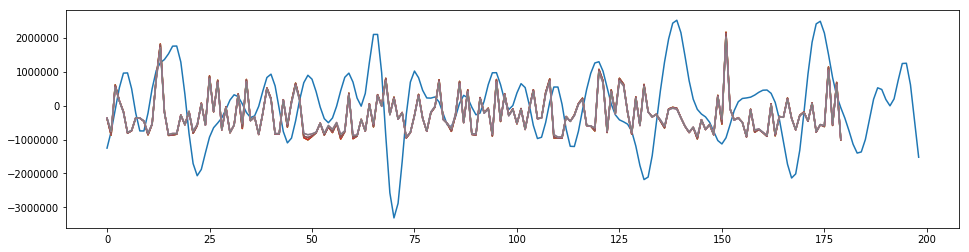

In [124]:
from seis_ampl_spectrum import *
freqs=(1,10,15,20,25,35,45)
dt=np.diff(f.samples[0:2])[0]/1e3
x2 = x.reshape((len(f.ilines), len(f.xlines), len(f.samples)))
il=1890
# for il in range(len(f.ilines)):
mdata=x2[np.where(f.ilines==il)[0][0],:,:]
#     break
extra_samples=1
mdd=np.append(np.append(np.zeros((mdata.shape[0],extra_samples)),mdata[:,:], axis=1),np.zeros((mdata.shape[0],extra_samples)), axis=1)
msd=bruges.attribute.spectraldecomp(mdd.T, f=freqs,window_length=0.010,dt=dt,overlap=0.002,)
mdata.shape,mdd.shape,msd.shape
plt.figure(figsize=(16,4))
plt.plot(mdata[55,1:200])
freq,amp,db,fpeak = fullspec(mdata,1000*dt)
# print('freq: ',freq)
for i in range(len(freqs)):
    msd[:,:,i]=msd[:,:,i]-np.mean(msd[:,:,i])
    plt.plot(msd[1:200,55,i])
    freq,amp,db,fpeak = fullspec(msd[:,:,i].T,1000*dt)
#     print('freq: ',freq)

# freq,amp,db,fpeak = fullspec(mdata,1000*dt)
# for i in range(len(freqs)):
#     vm = np.percentile(msd[:,:,i], 99)
#     plt.figure(figsize=(12,4))
#     plt.imshow(msd[:,:,i],cmap='rainbow' , vmin=-vm, vmax=vm, aspect='auto')#cmap="RdBu"
#     plt.clim(-vm,vm)
#     plt.title('STFT 20ms, Class 3 AVO gas sand, f='+str(i)), plt.colorbar()
#     freq,amp,db,fpeak = fullspec(msd[:,55,i].T,1000*dt)

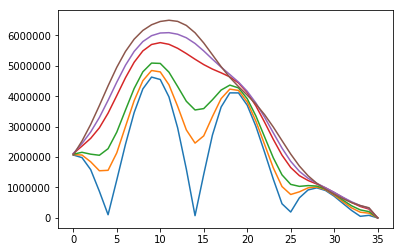

In [86]:
# mdata[0:2,:]
# plt.figure(figsize=(16,2))
# plt.plot(mdata.T[:,0])
# plt.show()
# np.where(f.ilines==il),x2.shape,x2[np.where(f.ilines==il)[0][0],:,:]
# mdata.shape,freq,amp,db,fpeak
# for i in range(6):
#     plt.plot(msd[:,55,i])

In [ ]:
for i,fq in enumerate(freqs):
    freq,amp,db,fpeak = fullspec(ildata,sr)

In [118]:
extra_samples=7
data=np.append(np.append(np.zeros((x.shape[0],extra_samples)),x[:,:], axis=1),np.zeros((x.shape[0],extra_samples)), axis=1)
sd=bruges.attribute.spectraldecomp(data.T, f=freqs,window_length=0.030,dt=dt,overlap=1,)
x.shape,data.shape,sd.shape,len(f.ilines), len(f.xlines),f.samples



KeyboardInterrupt: 

In [28]:
# dir(f.header)
# f.text[0]
dstpath=folder+'cropped_4_spect_decomp_f{}.sgy'
dstpath

'..\\d11_data\\\\cropped_4_spect_decomp_f{}.sgy'

In [ ]:
dstpath=folder+'cropped_4_spect_decomp_f{}.sgy'
spec = segyio.tools.metadata(f)
# spec.samples = spec.samples[:len(spec.samples) - 50]
for i,fq in enumerate(widths):
    print(fq)
    with segyio.create(dstpath.format(fq), spec) as dst:
        dst.text[0] = f.text[0]
        dst.bin = f.bin
        dst.header = f.header
        dst.trace = spec_data[:,:,i]

In [79]:
# # sd[:,:,0]
# # (52461, 41)
# sf=spec_data[:,:,0]
# # for i in range(sd.shape[2]):
# #     sf=sd[:,:,i].T
# sf = sf.reshape((len(f.ilines), len(f.xlines), len(f.samples)))
#     break
# data.shape,sd.shape,len(f.ilines), len(f.xlines),
sf.shape,spec_data.shape,x.shape

((261, 201, 41), (52461, 41, 7), (52461, 41))

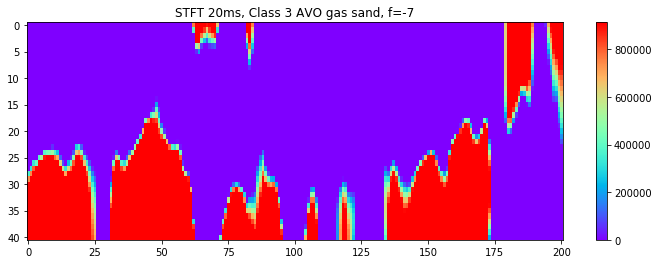

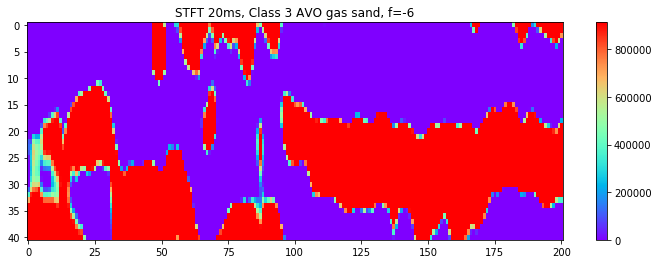

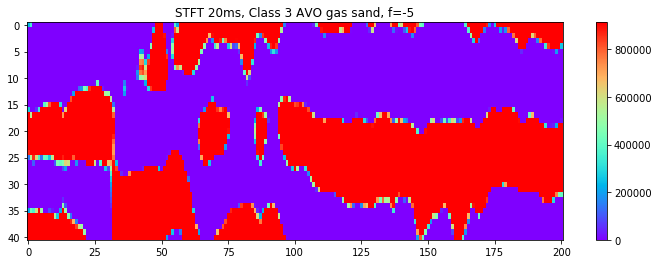

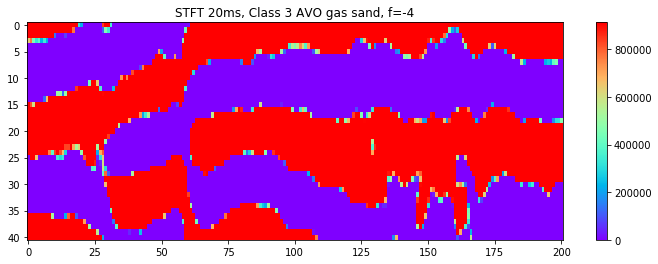

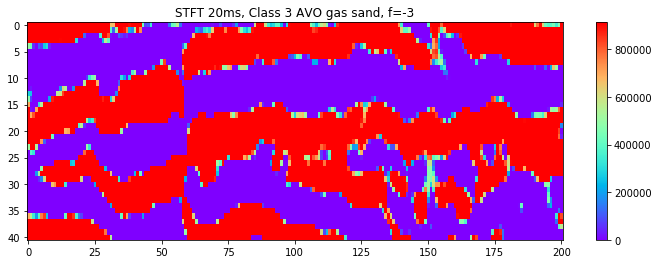

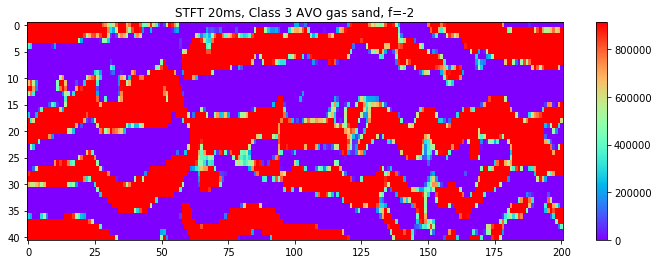

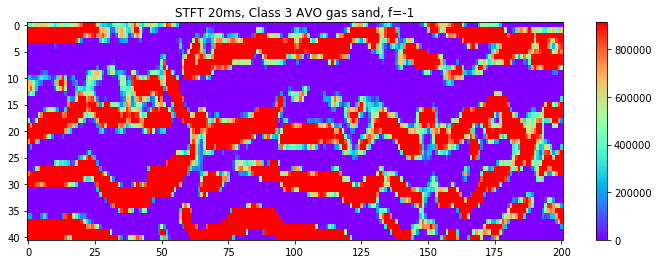

In [77]:
# plt.figure(figsize=(12,4))
# # plt.imshow(mdata.T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto')
# plt.colorbar()
# plt.show()
for i in range(-len(widths),0):
    sf=spec_data[:,:,i]
    sf = sf.reshape((len(f.ilines), len(f.xlines), len(f.samples)))
#     plt.figure(figsize=(7,5))
#     plt.imshow(sd[:,:,i].T,aspect='auto',interpolation='bilinear',cmap='rainbow')
#     plt.clim(0,914000.225)
#     plt.title('STFT 20ms, Class 3 AVO gas sand, f='+str(i)), plt.colorbar()
    vm = np.percentile(sf[10,:,:], 99)
    plt.figure(figsize=(12,4))
    plt.imshow(sf[10,:,:].T, cmap='rainbow', vmin=-vm, vmax=vm, aspect='auto')
    plt.clim(0,914000.225)
    plt.title('STFT 20ms, Class 3 AVO gas sand, f='+str(i)), plt.colorbar()
#     plt.colorbar()
    plt.show()

In [19]:
# plt.figure(figsize=(16,8))
# plt.imshow(similarity.T, cmap="viridis", aspect='auto')
# plt.colorbar()
# plt.show()

In [15]:
out = Stream(Trace(t, header=dict(delta=dt)) for t in similarity)

In [17]:
out.stats = Stats(dict(textual_file_header=stream.textual_file_header[:800]))
out.stats.textual_file_header += """Similarity volume.
Generated: 18 Sep 2016 by Matt Hall matt@agilegeoscience.com.
Algorithm: github.com/agile-geoscience/bruges.attribute.similarity.
Parameters: duration=0.16 s, dt=0.008 s.""".encode('utf-8')